### Importing Libraries

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### Reading data

In [17]:
data = pd.read_csv('01_Classification_data_set.csv', delimiter = ';')

In [18]:
data.head()

CCreditScore CGeography CGender  CAge  CTenure   CBalance  CNumOfProducts  \
0           619     France  Female    42        2       0.00               1   
1           608      Spain  Female    41        1   83807.86               1   
2           502     France  Female    42        8  159660.80               3   
3           699     France  Female    39        1       0.00               2   
4           850      Spain  Female    43        2  125510.82               1   

   CHasCrCard  CIsActiveMember CEstimatedSalary  Churn  
0           1                1        101348.88      1  
1           0                1        112542.58      0  
2           1                0        113931.57      1  
3           0                0         93826.63      0  
4           1                1          79084.1      0

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CCreditScore      10000 non-null  int64  
 1   CGeography        10000 non-null  object 
 2   CGender           10000 non-null  object 
 3   CAge              10000 non-null  int64  
 4   CTenure           10000 non-null  int64  
 5   CBalance          10000 non-null  float64
 6   CNumOfProducts    10000 non-null  int64  
 7   CHasCrCard        10000 non-null  int64  
 8   CIsActiveMember   10000 non-null  int64  
 9   CEstimatedSalary  10000 non-null  object 
 10  Churn             10000 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 859.5+ KB


In [20]:
data.shape

(10000, 11)

### Data Cleaning

In [21]:
# Check for null values
data.isna().sum()
# Results show that the data is already clean.

CCreditScore        0
CGeography          0
CGender             0
CAge                0
CTenure             0
CBalance            0
CNumOfProducts      0
CHasCrCard          0
CIsActiveMember     0
CEstimatedSalary    0
Churn               0
dtype: int64

### Data Preprocessing

In [22]:
# Label Enconding
data2 = data.apply(LabelEncoder().fit_transform)

In [23]:
data2.head()

CCreditScore  CGeography  CGender  CAge  CTenure  CBalance  CNumOfProducts  \
0           228           0        0    24        2         0               0   
1           217           2        0    23        1       743               0   
2           111           0        0    24        8      5793               2   
3           308           0        0    21        1         0               1   
4           459           2        0    25        2      3696               0   

   CHasCrCard  CIsActiveMember  CEstimatedSalary  Churn  
0           1                1                93      1  
1           0                1               723      0  
2           1                0               794      1  
3           0                0              9670      0  
4           1                1              8801      0

### Data Visualization

In [24]:
d = pd.DataFrame(data2["Churn"].value_counts())
fig = px.pie(d, values = "Churn", names = [1, 0], hole = 0.40, opacity = 0.9,
            labels = {"label" :"Yes","No":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart of Churn ratio"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

<AxesSubplot:xlabel='CGender', ylabel='count'>

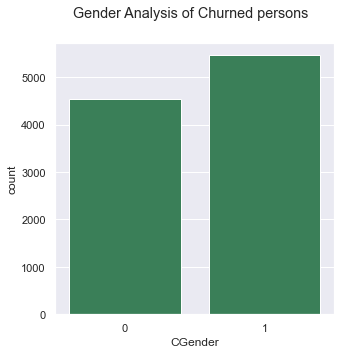

In [25]:
plt.figure(figsize=(5,5))
sns.set()
plt.suptitle('Gender Analysis of Churned persons')
sns.countplot(data2['CGender'], color = 'seagreen')

### Feature Extraction

In [26]:
x = np.array(data2[list(data2.columns)[:-1]])
y = np.array(data2['Churn'])

### Downsampling

In [27]:
from imblearn.under_sampling import RandomUnderSampler
# Define the undersampling method
undersampler = RandomUnderSampler()

# # Undersample the data
x_sampled, y_sampled = undersampler.fit_resample(x, y)

### Train-test Spliting 

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled , test_size = 0.2, 
                                                    random_state=42)

# Qno.1

### Model Training
* Decision Tree
* k-Nearest	Neighbors(kNN)
* Logistic	Regression

#### Decision Tree

In [29]:
t_model = DecisionTreeClassifier()

In [30]:
t_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
tree_p = t_model.predict(x_test)

In [32]:
acc_tree = round(accuracy_score(y_test, tree_p), 2)
print('\nAccuracy of model\n\n-->', acc_tree)


Accuracy of model

--> 0.69


#### K-Nearest Neighbors(kNN)

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [34]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
knn_p = knn_model.predict(x_test)

In [36]:
acc_knn = round(accuracy_score(y_test, knn_p), 2)
print('\nAccuracy of model\n\n-->', acc_knn)


Accuracy of model

--> 0.51


#### Logistic	Regression

In [37]:
lg_model = LogisticRegression()

In [38]:
lg_model.fit(x_train, y_train)

LogisticRegression()

In [39]:
lg_p = lg_model.predict(x_test)

In [40]:
acc_lg = round(accuracy_score(y_test, lg_p), 2)
print('\nAccuracy of model\n\n-->', acc_lg)


Accuracy of model

--> 0.67


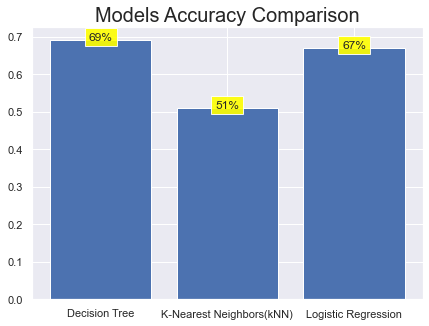

In [41]:
models_acc = [acc_tree, acc_knn, acc_lg]
models_names = ['Decision Tree','K-Nearest Neighbors(kNN)','Logistic Regression']
plt.figure(figsize=(7,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy Comparison", fontsize=20)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(models_acc[i],2),f"{int(round(models_acc[i],2) * 100)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()

As you can see that the accuracy on unseen data of Decision Tree model is highest than the other two models. So I would recommend to choose Decision Tree beacuse it is performing well on the data.

# Qno.2

* #### Hyperparameter tuning

In [42]:
new_tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=10, max_features=3)

In [43]:
new_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=10,
                       min_samples_split=20)

In [44]:
new_tree_p = new_tree_model.predict(x_test)

In [45]:
acc_new_tree = round(accuracy_score(y_test, new_tree_p), 1)
print(f'\nAccuracy of model\n\n --> {acc_new_tree * 100}%')


Accuracy of model

 --> 70.0%


### Cross-Validation

In [46]:
scores = cross_val_score(new_tree_model, x_sampled, y_sampled, cv=5)

# Print the mean and standard deviation of the scores
print(scores)

[0.70552147 0.69447853 0.66257669 0.72269939 0.72604423]


In [47]:
print(f"Mean score: {np.mean(scores) * 100:.2f} %")

Mean score: 70.23 %


I have hyperparameters approch to increase the performance of Decision Tree model. As you can see that mean score of cross validation is 70% which is accurate than other two models. So it is highly recommended that you should choose Decision Tree.

# Qno.3

In [48]:
rf_model = RandomForestClassifier(max_features='sqrt')
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [49]:
rf_p = rf_model.predict(x_test)

In [50]:
acc_rf = round(accuracy_score(y_test, rf_p), 1)

In [51]:
print(f'\nAccuracy of model\n\n--> {acc_rf * 100}%')


Accuracy of model

--> 80.0%


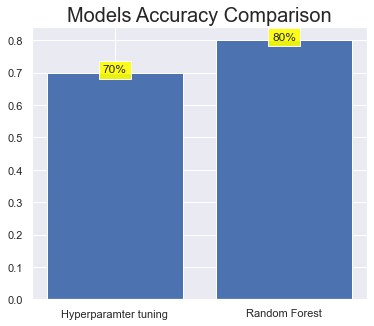

In [52]:
models_acc = [acc_new_tree, acc_rf]
models_names = ['Hyperparamter tuning','Random Forest']
plt.figure(figsize=(6,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy Comparison", fontsize=20)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(models_acc[i],2),f"{int(round(models_acc[i],2) * 100)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()

As the accuracy on unseen data on RandomForest Classifier is 80% which is best accuracy throughout applying different machine learning models such as KNN, Logistic Regression in Task 1 and Decision Tree in Task 2. It means that Ensemble learning teachinque is the best machine learning technique for classification for this dataset.